In [3]:
from O.MM.sc_system import *

In [4]:
name = 'mivebresib'
PATH = DIR_main+f'MM/GAFF_sc/{name}/'
n_atoms_mol = 51
FF_class = GAFF
#list_metastable_states = [...] not known yet, not going into this detail here.

ind_rO = 22 ; option = 0

In [5]:
T = 300 # K

# MD (unbiased)
# [TODO: make another notebook using biased MD to show MD cost saving]

In [6]:
'''
from O.MM.sc_system import *

name = 'mivebresib'
PATH = DIR_main+f'MM/GAFF_sc/{name}/'
n_atoms_mol = 51
FF_class = GAFF
ind_rO = 22 ; option = 0

T = 300 # K
for run in [1,2,3,4,5]:
    dataset_name =  f'{PATH}/data/{name}_{FF_class.FF_name.lower()}_NVT_dataset_single_molecule_Temp_{T}_100ns'+'_'+str(run)
    
    PDB = f'{PATH}/{name}_single_mol.pdb'
    sc = SingleComponent(PDB = PDB,
                   name = name,
                   n_atoms_mol = n_atoms_mol,
                   FF_class = FF_class,
                   )
    sc.initialise_system_()
    sc.initialise_simulation_(timestep_ps=0.002, T=T)
    sc.run_simulation_(1000000,50)
    sc.save_simulation_data_(dataset_name)
    TestConverged_1D(sc.u)
    print('done')
''';

'''
T = 300 # K
dataset_concat = concatenate_datasets_([f'{PATH}/data/{name}_{FF_class.FF_name.lower()}_NVT_dataset_single_molecule_Temp_{T}_100ns'+'_'+str(run) 
                                        for run in [1,2,3,4,5]],
                                        remove_warmup = 10000)
save_pickle_(dataset_concat, f'{PATH}/data/{name}_{FF_class.FF_name.lower()}_NVT_dataset_single_molecule_Temp_{T}_100ns_1+2+3+4+5')
''';

In [10]:
T = 300 # K
dataset_name =  f'{PATH}/data/{name}_{FF_class.FF_name.lower()}_NVT_dataset_single_molecule_Temp_{T}_100ns_1+2+3+4+5'
sc = SingleComponent.initialise_from_save_(dataset_name)

# initialise_object (SingleComponent) with GAFF FF, from the input file (PDB):
 ./O//MM/GAFF_sc/mivebresib/mivebresib_single_mol.pdb
n_molecules: 1

# initialise_system:
! only one molecule in the system, setting non-bonded method to app.NoCutoff
removeCMMotion active: True

__ changing n_mol in top: ________________________________
in the /mnt/c/Users/User/Desktop/FEcrys/O/MM/GAFF_sc/mivebresib/misc/x_mivebresib_gmx.top
replaced 1 line ( 531 ) 
 from: 
     UNK                  1
 to 
     UNK                  1
these changes were written into file: /mnt/c/Users/User/Desktop/FEcrys/O/MM/GAFF_sc/mivebresib/misc/x_x_mivebresib_gmx.top
__________________________________________________________

no corrections to self.system
n_mol =  1, n_atoms_mol = 51, N = 51, n_DOF = 150 (n_constraints = 3) 

# initialise_simulation:
set temperature: 300 Kelvin
set integration timestep: 0.002 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before m

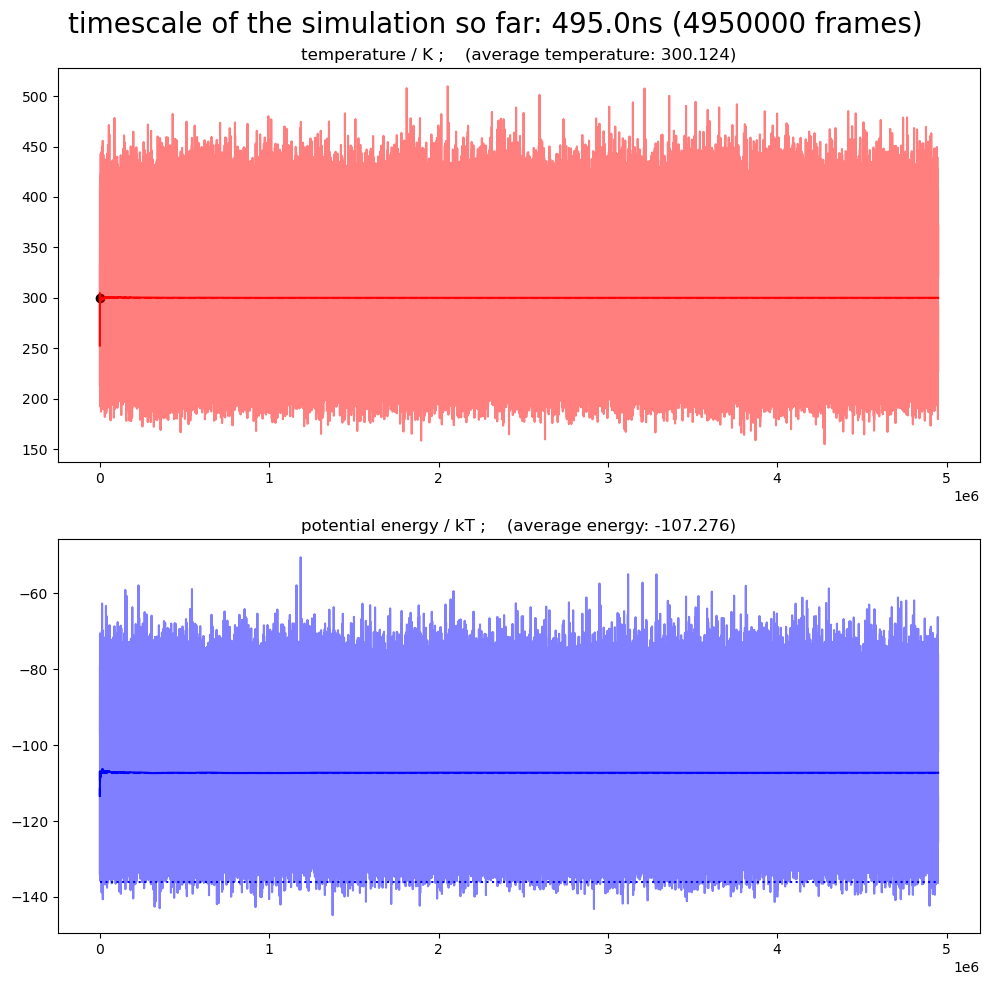

In [11]:
sc.plot_simulation_info_()

In [40]:
# visually checking if the total dataset ergodic by looking at the 1D histograms of torsional angles:

In [18]:
from O.NN.representation_layers import SC_helper

In [13]:
r = reshape_to_molecules_np_(sc.xyz, n_atoms_in_molecule=n_atoms_mol,n_molecules=1)

In [19]:
sc_helper = SC_helper(PDB_single_mol = sc._single_mol_pdb_file_)
sc_helper.set_ABCD_(ind_root_atom = ind_rO, option = option)

molecule with 51 atoms, of which 32 are heavy atoms, and the rest are 19 hydrogens.
atoms with incides [22, 25, 19] are set to be the Cartesian_Block
position of the molecule specified by atoms with index: 22
rotation of the molecule specified by atoms with indices: [25, 19]
conformation of the molecule specified by all other atoms.


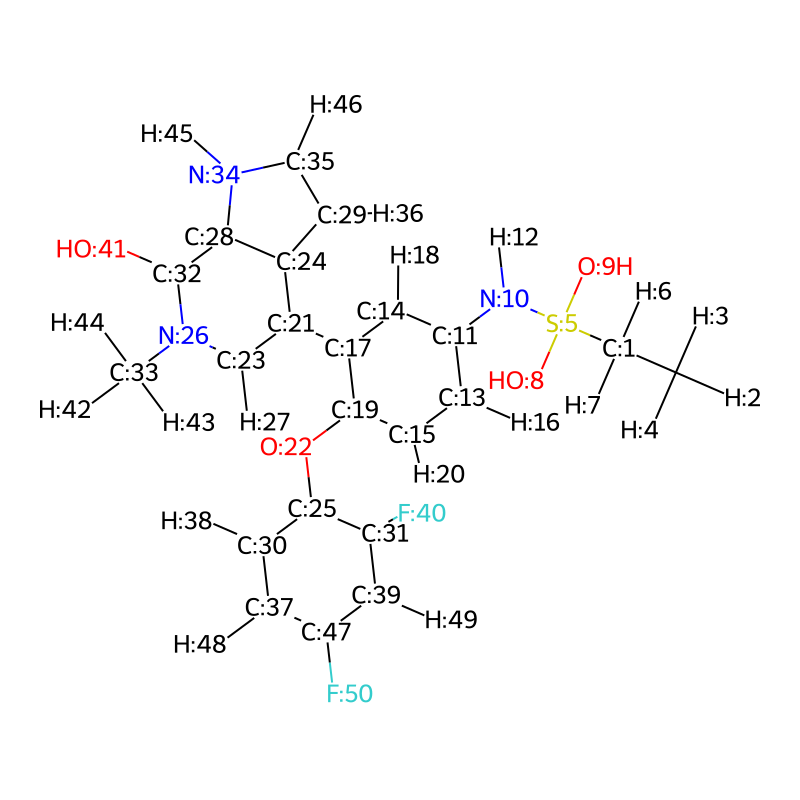

In [15]:
plot_mol_larger_(sc.mol)

In [16]:
torsions = []
for abcd in sc_helper.ABCD_IC:
    phi = get_torsion_np_(r, abcd)
    torsions.append(phi)
print('phi.shape:',phi.shape)
torsions = np.concatenate(torsions,axis=-2)[...,0]
print('torsions.shape:',torsions.shape)
#cs_torsions = np.concatenate([np.cos(torsions),np.sin(torsions)],axis=-1)
#print('cs_torsions.shape:',cs_torsions.shape)

phi.shape: (4950000, 1, 1)
torsions.shape: (4950000, 48)


In [17]:
halve = torsions.shape[0]//2

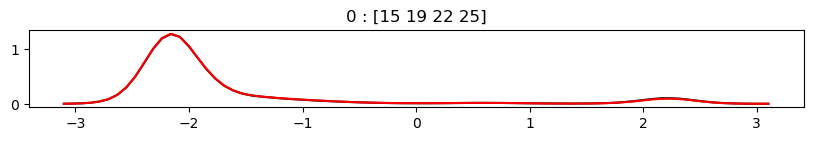

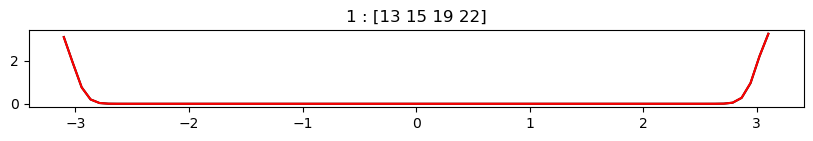

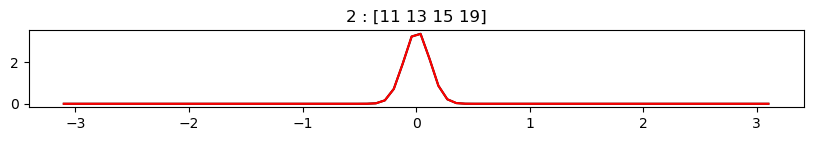

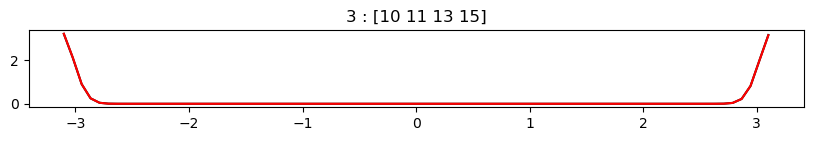

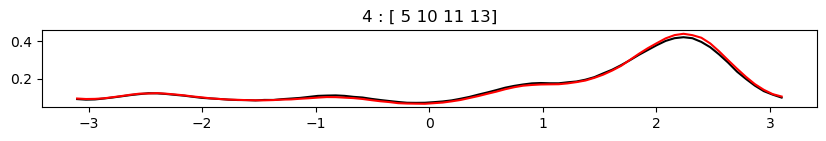

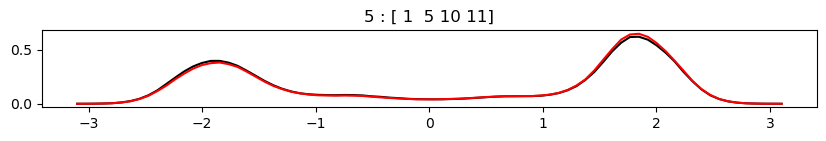

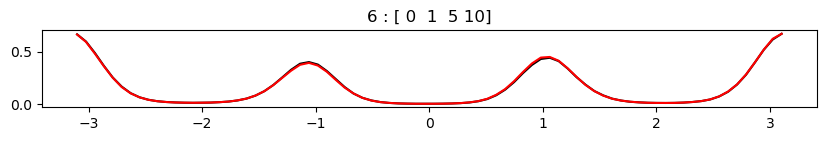

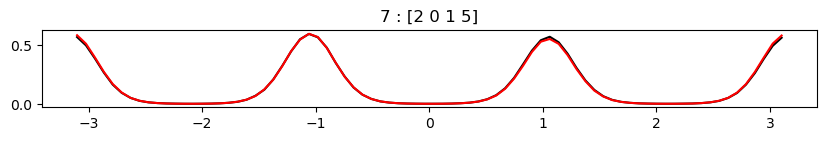

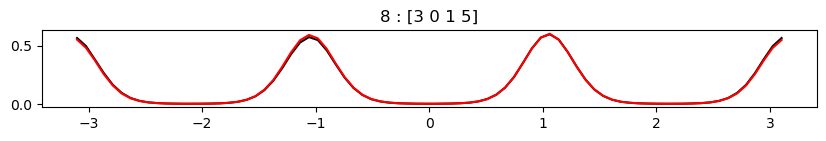

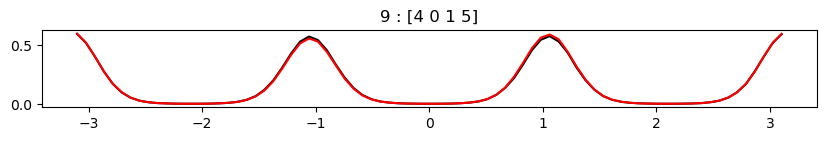

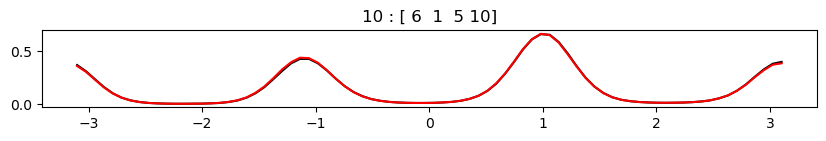

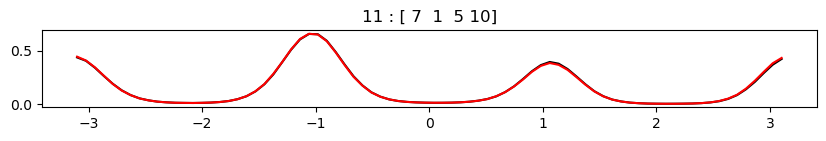

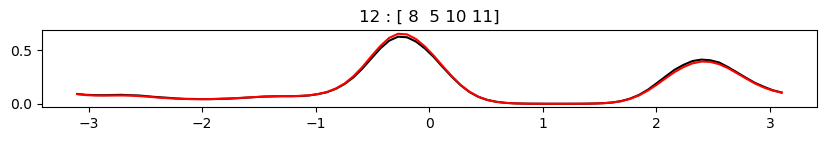

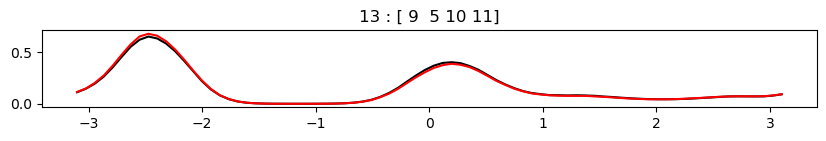

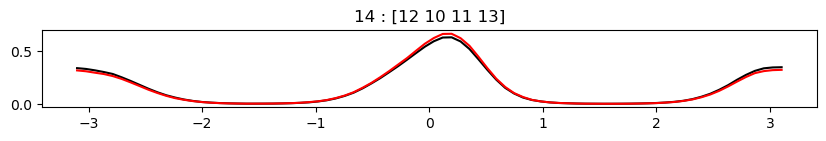

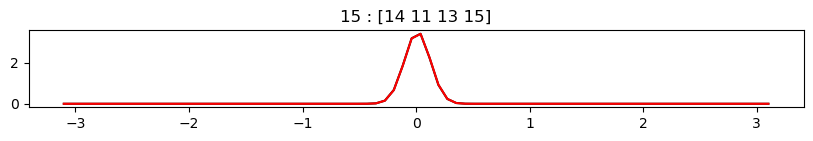

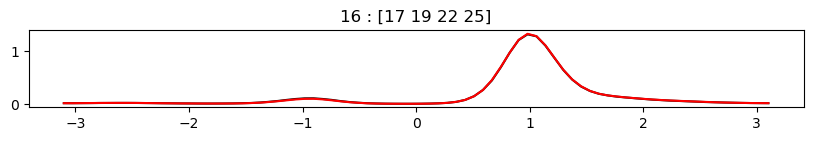

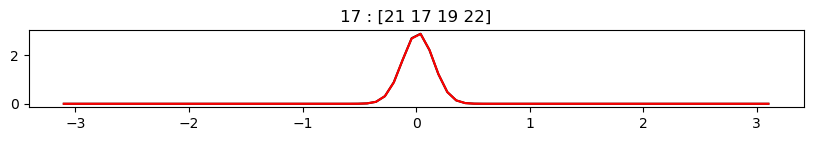

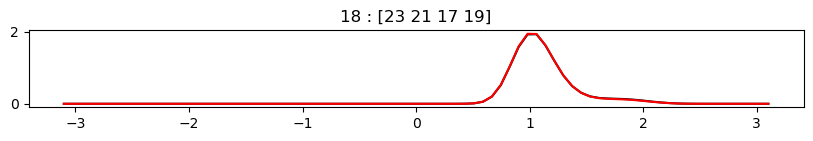

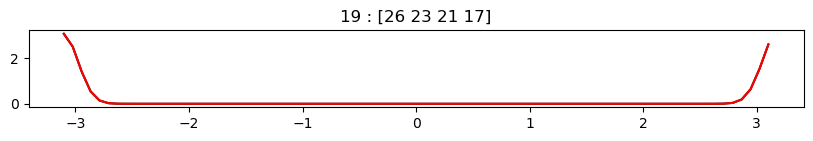

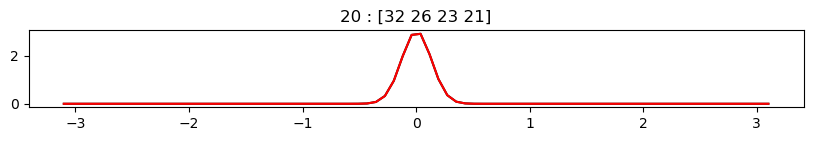

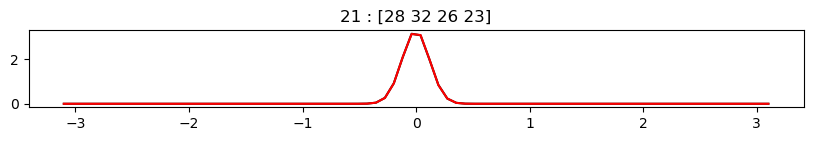

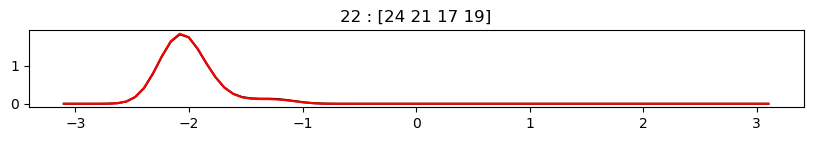

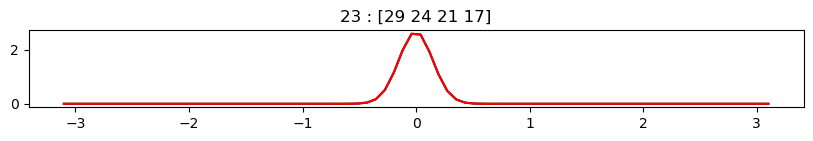

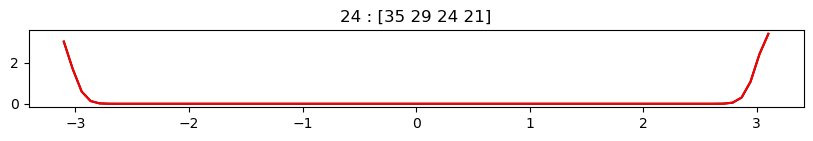

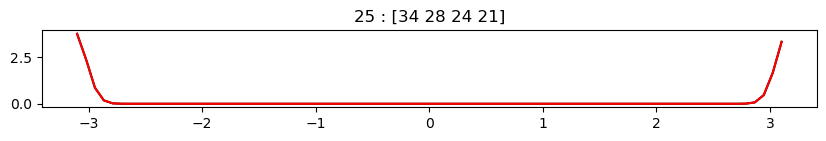

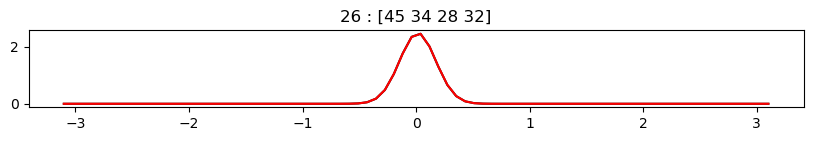

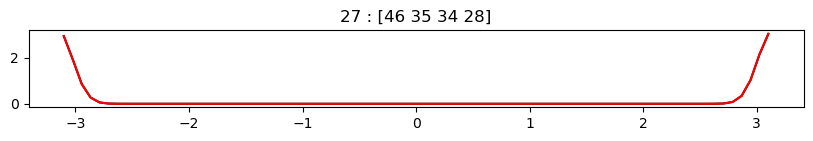

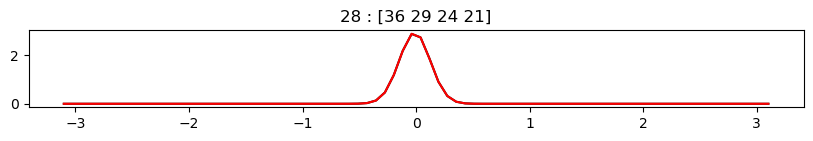

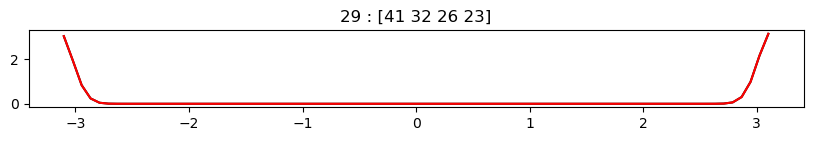

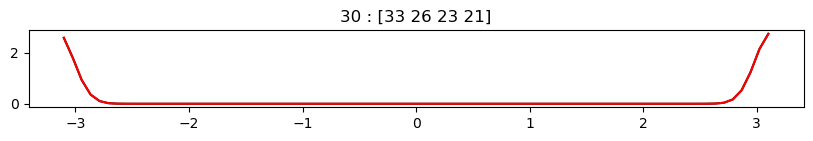

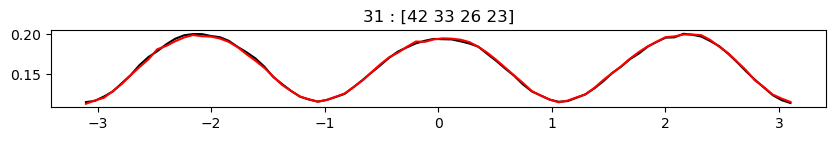

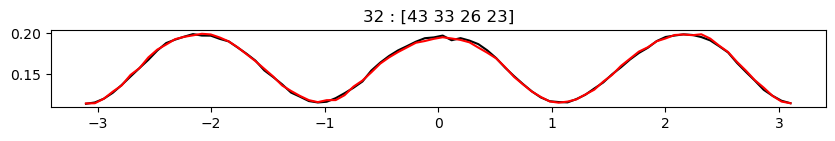

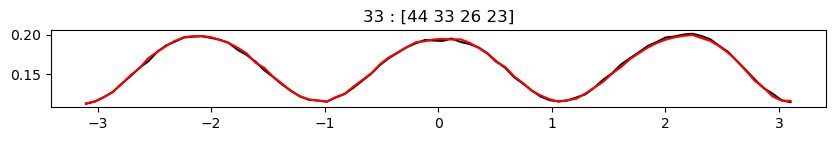

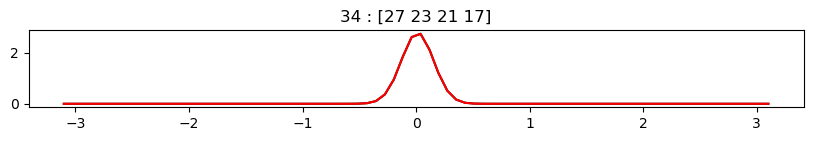

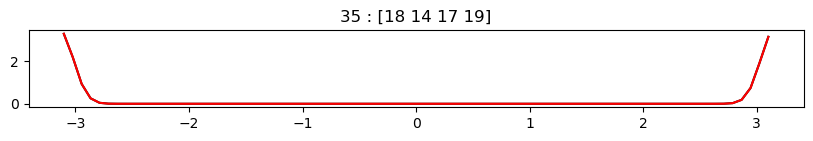

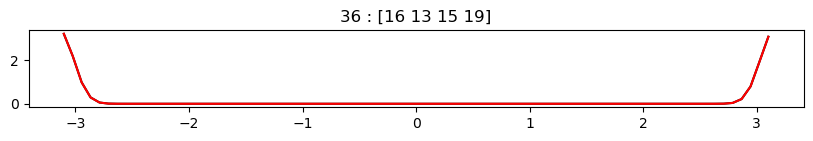

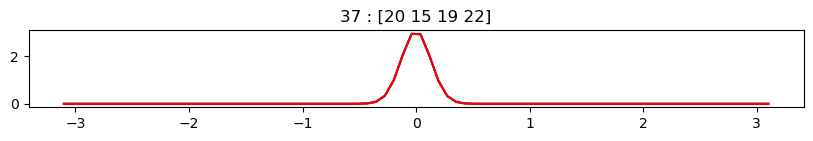

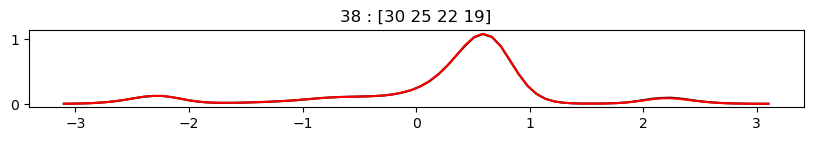

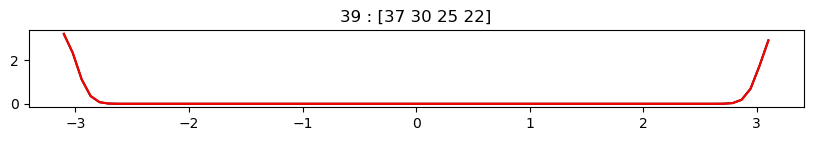

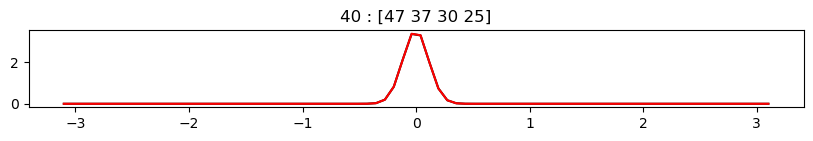

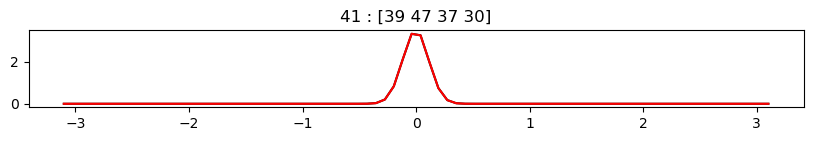

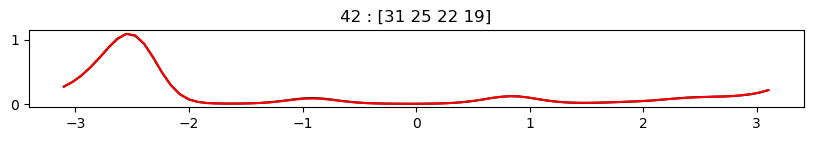

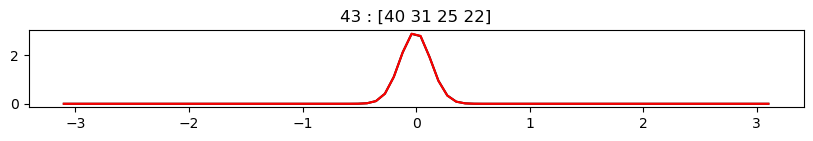

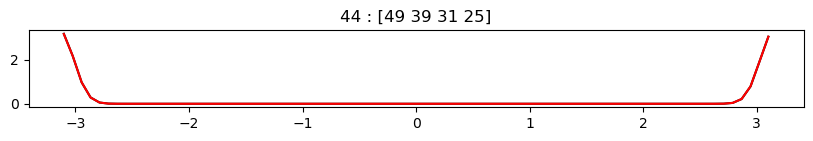

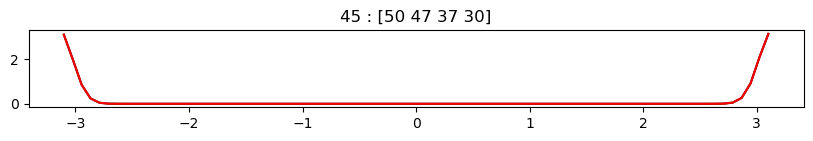

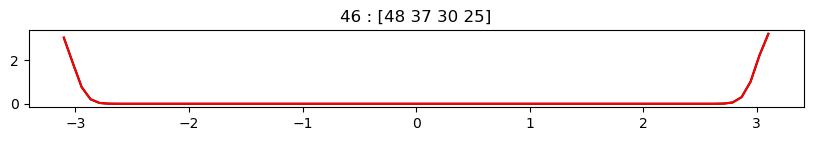

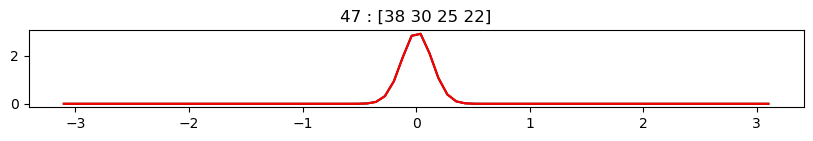

In [29]:
slow = []
for i in range(torsions.shape[-1]):
    #if sc_helper.ABCD_IC[i][0] not in sc_helper.inds_hydrogens:
    fig = plt.figure(figsize=(10,1))
    y0 = plot_1D_histogram_(torsions[:halve,i], color='black', return_xy=True, range=[-np.pi,np.pi])[-1]
    y1 = plot_1D_histogram_(torsions[halve:,i], color='red', return_xy=True, range=[-np.pi,np.pi])[-1]
    err = np.abs(y0-y1).mean() 
    if err > 0.005: slow.append([i, err, sc_helper.ABCD_IC[i]])
    else: pass
    plt.title(str(i)+' : '+str(sc_helper.ABCD_IC[i]))
    plt.show()

In [30]:
slow

[[4, 0.006165437427783733, array([ 5, 10, 11, 13])],
 [5, 0.006368126874501168, array([ 1,  5, 10, 11])],
 [12, 0.0063511503472380324, array([ 8,  5, 10, 11])],
 [13, 0.006338932392010778, array([ 9,  5, 10, 11])],
 [14, 0.008969779677576685, array([12, 10, 11, 13])]]

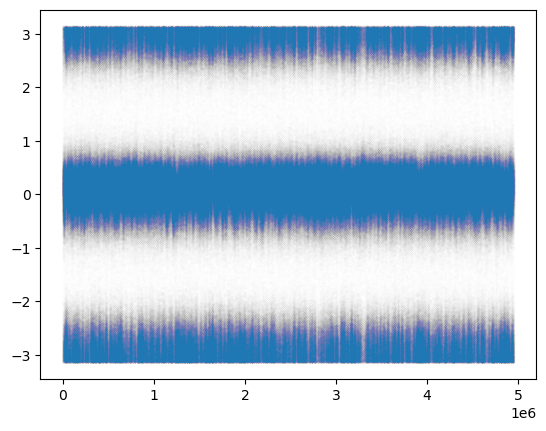

In [31]:
plt.scatter(np.arange(len(torsions)), torsions[...,14], s=0.00001)

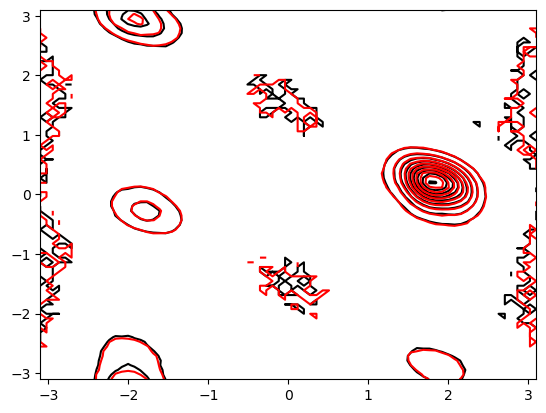

In [33]:
plot_2D_histogram_(torsions[:halve,5],torsions[:halve,14], colors='black', range=[[-np.pi,np.pi]]*2, levels=10)
plot_2D_histogram_(torsions[halve:,5],torsions[halve:,14], colors='red', range=[[-np.pi,np.pi]]*2, levels=10)

# PGMmol : training on the full configurational landscape of the molecule

In [6]:
from O.interface import *

In [7]:
dataset_name = f'{PATH}/data/{name}_{FF_class.FF_name.lower()}_NVT_dataset_single_molecule_Temp_{T}_100ns_1+2+3+4+5'
nn = NN_interface_sc_multimap(
    name = f'{name}_single_molecule_T={T}K',
    paths_datasets = [dataset_name],
    running_in_notebook = True,
    training = True,
    model_class = PGMmol,
    ic_map_class = SingleMolecule_map,
)

# initialise_object (SingleComponent) with GAFF FF, from the input file (PDB):
 ./O//MM/GAFF_sc/mivebresib/mivebresib_single_mol.pdb
n_molecules: 1

# initialise_system:
! only one molecule in the system, setting non-bonded method to app.NoCutoff
removeCMMotion active: True

__ changing n_mol in top: ________________________________
in the /mnt/c/Users/User/Desktop/FEcrys/O/MM/GAFF_sc/mivebresib/misc/x_mivebresib_gmx.top
replaced 1 line ( 531 ) 
 from: 
     UNK                  1
 to 
     UNK                  1
these changes were written into file: /mnt/c/Users/User/Desktop/FEcrys/O/MM/GAFF_sc/mivebresib/misc/x_x_mivebresib_gmx.top
__________________________________________________________

no corrections to self.system
n_mol =  1, n_atoms_mol = 51, N = 51, n_DOF = 150 (n_constraints = 3) 

# initialise_simulation:
set temperature: 300 Kelvin
set integration timestep: 0.002 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before m

In [8]:
nn.set_ic_map_step1(ind_root_atom = ind_rO, option = option)

molecule with 51 atoms, of which 32 are heavy atoms, and the rest are 19 hydrogens.
atoms with incides [22, 25, 19] are set to be the Cartesian_Block
position of the molecule specified by atoms with index: 22
rotation of the molecule specified by atoms with indices: [25, 19]
conformation of the molecule specified by all other atoms.


In [9]:
nn.set_ic_map_step2(check_PES=True)

COM removed from data without taking into account PBC of the box
inds_rand attempt: 1
found !
checking that PES matches the sampled dataset:
errT: -1.4819324752437523e-06 -0.00016516894460494314 0.0001774036812491886
errV: -3.0311560020379604e-06 -0.00018046236540669724 0.00014375815548817172


In [10]:
nn.set_ic_map_step3(1)

initialising on 4950000 datapoints provided
18 out of 48 potentially periodic marginal variables are set to periodic
This topology is shared over all molecules.

ic_map inversion errors on a small random batch:
positons: 1.8800371
volume: 6.1035156e-05
0.9999203


In [11]:
nn.set_model(
                learning_rate = 0.001, 
                evaluation_batch_size = 5000,
                n_layers = 4,
            )

2025-07-14 02:14:11.655166: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


There are 29576514 trainable parameters in this model, among 64 trainable weights.
[To see dimensionalities of the trainable weights print(list(self.shapes_trainable_weights)).] 
inv_test_res0 ([[0.31854478, 1.9751792], [-1.9592285e-06, -0.007507324, 0.006866455]], [[[2.9853576e-05, 1.9999337]], [7.498169e-05, -0.015106201, 0.011047363]])


In [12]:
##############################################
# check invertibility of positions:

In [107]:
# the main part of invertibility tests is to check that absolute log volume change is the same in both directions (forward and inverse).
# both forward invertibility tests (of the ic_map, and of the for full_model), show error in positions, because MD molecule rotated arbitrarily in xyz
#     MD data of molecule was and is not aligned to remove rotation, because this is not needed (in PGMmol; compared to the older code RW_PGM_FE).
# All PGM outputs corespond to a fixed rotation, causing mismatch in rotation only duringe the xyz comparison above.
# The same test in the inverse direction was fine for both positions and volumes (because variable z is missing rotations from the start).
# The potential energy function is invariant to rotations and translations, so can test forward test separately here:
# check invertibility again (in the forward direction) using energy as dissimilarity metric for positions (instead of differences in xyz):

In [14]:
r_ref = nn.nns[0].r_validation[:1000]
X, ladJf = nn.model.forward_(r_ref)
r_test, ladJi = nn.model.inverse(X)
u_ref = nn.nns[0].u_(r_ref)
u_test = nn.nns[0].u_(r_test)

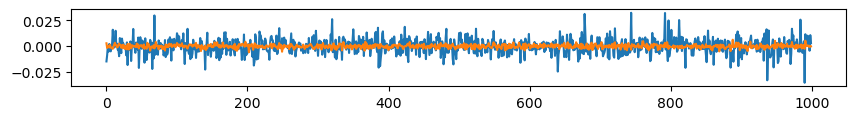

In [15]:
fit = plt.figure(figsize=(10,1))
# checking energy (pisitions up to rotation and translation):
plt.plot(u_ref - u_test) # kT small round-off errors < 0.05 kT / molecule
# checking volume:
plt.plot(ladJf + ladJi)  # kT very small round-off errors

In [16]:
##############################################

In [17]:
nn.set_trainer(n_batches_between_evaluations=50)

'26.16 999 2999 59 AVMD_T:[437.76553263] AVMD_V:[437.55013435471835] || FE:[441.15162059933556] SD:[0.035890432248368374]'

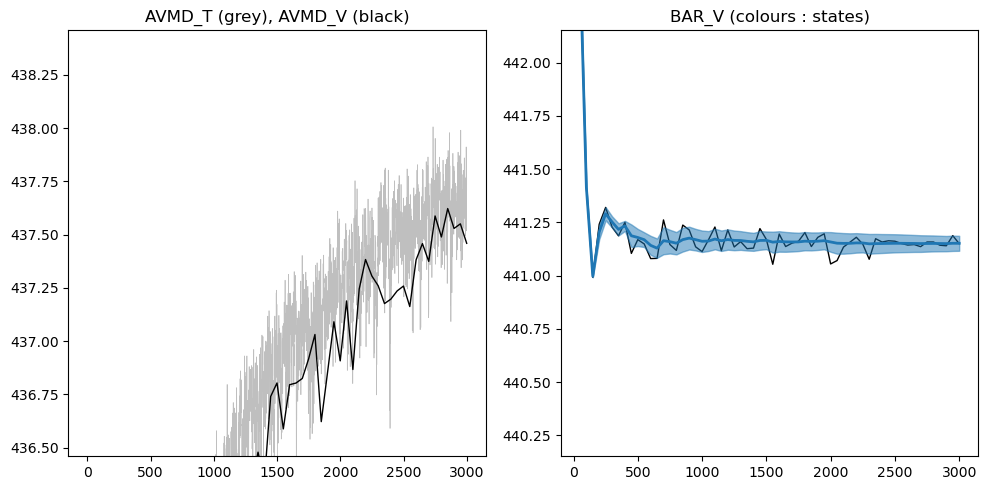

training time so far: 26.24 minutes
saved ./O//NN/training_results/misc/mivebresib_single_molecule_T=300K_SC__misc_
misc training outputs were saved


In [19]:
n_batches = 3000
nn.train(   n_batches=n_batches,
            save_BAR = True,
            f_halfwindow_visualisation = 1.0,
        )

In [20]:
nn.load_misc_()

In [21]:
nn.load_energies_during_training_()

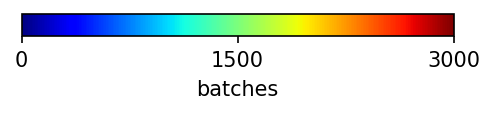

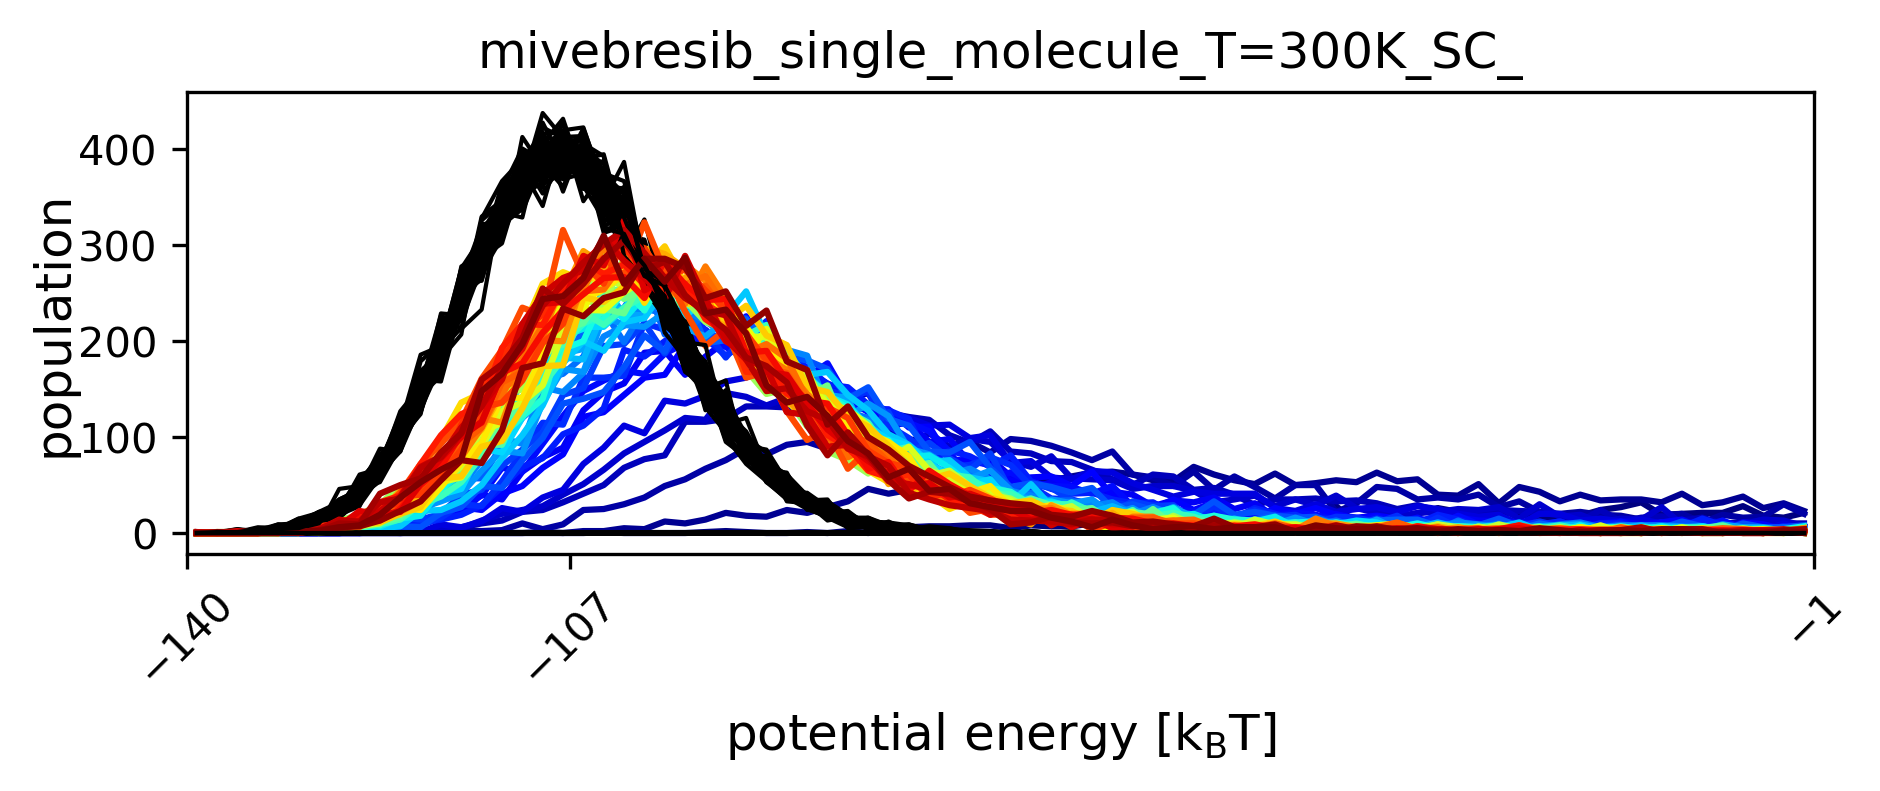

In [22]:
nn.plot_energies_during_training_(_range=[-140,-1])

In [23]:
nn.solve_BAR_using_pymbar_() # rerun=True if saving again with same name

59
BAR: T estimate59skipped
saved ./O//NN/training_results/BAR/mivebresib_single_molecule_T=300K_SC__BAR__BAR_output_crystal_index=0
saved BAR result


441.1515599431716 +/- 0.035257635267197766 final: 441.15155994317143 +/- 0.03799956654309009


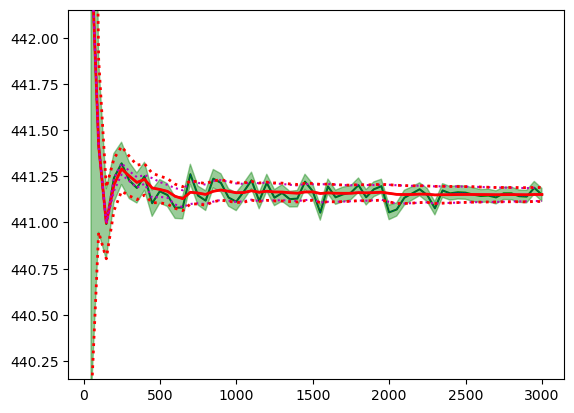

In [24]:
nn.plot_result_()

In [25]:
nn.save_model_()

saved ./O//NN/training_results/fitted_models/mivebresib_single_molecule_T=300K_SC__model_


In [26]:
nn.save_samples_(10000)

saved ./O//NN/training_results/samples/mivebresib_single_molecule_T=300K_SC__samples__crystal_index=0


In [ ]:
########################################
# visual check of the model's samples (looking in VDM is better):

In [27]:
r_BG = nn.sample_model_(5000)
r_MD = nn.nns[0].ic_map.inverse_(nn.nns[0].ic_map.forward_(np2tf_(nn.nns[0].r_validation[:len(r_BG)]))[0])[0].numpy()
r_BG.shape, r_MD.shape

((5000, 51, 3), (5000, 51, 3))

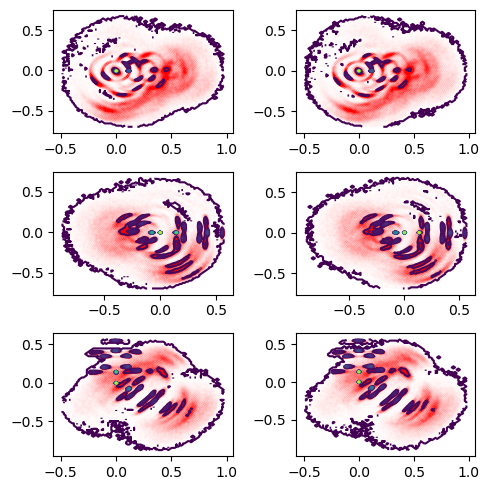

In [28]:
fig,ax = plt.subplots(3,2, figsize=(5,5)) ; a = 0
for i,j in zip([0,2,0],[1,1,2]):
    ax[a,1].scatter(r_BG[...,i], r_BG[...,j], color='red', s=0.00001)
    plot_2D_histogram_(r_BG[...,i], r_BG[...,j], levels = 50, ax=ax[a,1], bins=100)
    
    ax[a,0].scatter(r_MD[...,i], r_MD[...,j], color='red', s=0.00001)
    plot_2D_histogram_(r_MD[...,i], r_MD[...,j], levels = 50, ax=ax[a,0],  bins=100)
    a+=1
plt.tight_layout()

In [ ]:
##############################################

In [ ]:
##############################################

## preparing for the next part:

In [35]:
r_BG = nn.sample_model_(100000)
r_MD = nn.nns[0].ic_map.inverse_(nn.nns[0].ic_map.forward_(np2tf_(nn.nns[0].r_validation[:len(r_BG)]))[0])[0].numpy()
r_BG.shape, r_MD.shape

((100000, 51, 3), (100000, 51, 3))

In [36]:
inds_CV = [31,25,22,19] 
# not intentional that this DOF is near the cartesian block
# this is actually not a good CV for describing the shape, an improper torsional angle would be more practically useful

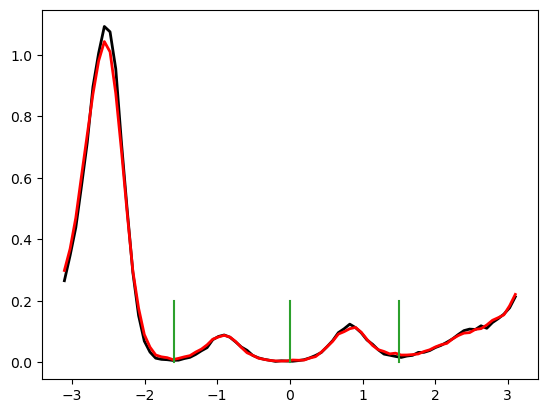

In [37]:
plot_1D_histogram_(get_torsion_np_(r_MD,inds_CV), range=[-np.pi,np.pi], color='black', linewidth=2)
plot_1D_histogram_(get_torsion_np_(r_BG,inds_CV), range=[-np.pi,np.pi], color='red', linewidth=2)

plt.plot([-1.6]*2,[0,0.2], color='C2')
plt.plot([0]*2,[0,0.2], color='C2')
plt.plot([1.5]*2,[0,0.2], color='C2')

In [38]:
def cluster_(r, 
             inds_CV = inds_CV):
    r = np.array(r)
    phi = get_torsion_np_(r,inds_CV).flatten()
    cluster_assignments = np.zeros([len(r)]).astype(np.int32)
    inds_B = np.where(np.logical_and(phi>=-1.6, phi<=0.0))[0]
    cluster_assignments[inds_B] = 1
    inds_C = np.where(np.logical_and(phi>0.0, phi<=1.5))[0]
    cluster_assignments[inds_C] = 2
    return cluster_assignments

def negative_log_indicator_function_(r, k):
    return np.where(cluster_(r)==k, 0.0, 1e20)[:,np.newaxis]

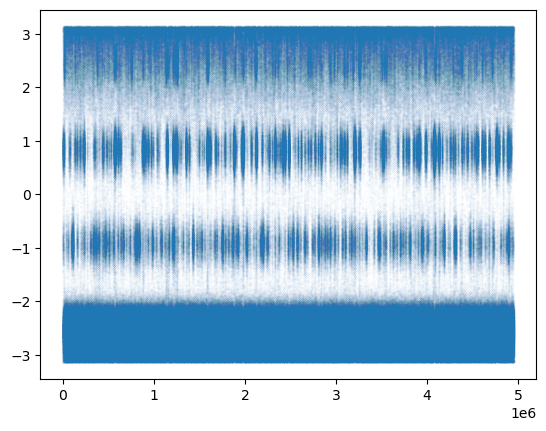

In [60]:
plt.scatter( np.arange(len(c_MD)), get_torsion_np_(nn.nns[0].r,inds_CV).flatten(), s=0.0001)

In [50]:
c_MD = cluster_(nn.nns[0].r)
counts = np.array([np.where(c_MD==k,1,0).sum() for k in range(3)]).astype(np.float32)
delta_f = - np.log(counts/counts.sum())
delta_f -= delta_f.min()
delta_f

array([0.      , 2.734086, 2.387801], dtype=float32)

In [41]:
def save_simulation_data_here_(self, path_and_name:str, inds_select=None):
    '''
    simulation timescale = len(u) * stride_save_frame * timestep_ps
    '''
    dataset = {'xyz':self.xyz[inds_select],
               'COMs':self.COMs[inds_select],
               'b':self.boxes[inds_select],
               'u':self.u[inds_select],
               'T':self.temperature[inds_select],
               
               'rbv':[self._current_r_, self._current_b_, self._current_v_], # to resume
               'stride_save_frame':self.stride_save_frame,
               }
    assert hasattr(self, 'simulation')
    simulation_data = {'MD dataset':dataset,
                       'args_initialise_object': self.args_initialise_object,
                       'args_initialise_system': self.args_initialise_system,
                       'args_initialise_simulation': self.args_initialise_simulation,
                      }
    save_pickle_(simulation_data, path_and_name)

In [43]:
dataset_name = f'{PATH}/data/{name}_{FF_class.FF_name.lower()}_NVT_dataset_single_molecule_Temp_{T}_100ns_1+2+3+4+5'
sc = SingleComponent.initialise_from_save_(dataset_name)

# initialise_object (SingleComponent) with GAFF FF, from the input file (PDB):
 ./O//MM/GAFF_sc/mivebresib/mivebresib_single_mol.pdb
n_molecules: 1

# initialise_system:
! only one molecule in the system, setting non-bonded method to app.NoCutoff
removeCMMotion active: True

__ changing n_mol in top: ________________________________
in the /mnt/c/Users/User/Desktop/FEcrys/O/MM/GAFF_sc/mivebresib/misc/x_mivebresib_gmx.top
replaced 1 line ( 531 ) 
 from: 
     UNK                  1
 to 
     UNK                  1
these changes were written into file: /mnt/c/Users/User/Desktop/FEcrys/O/MM/GAFF_sc/mivebresib/misc/x_x_mivebresib_gmx.top
__________________________________________________________

no corrections to self.system
n_mol =  1, n_atoms_mol = 51, N = 51, n_DOF = 150 (n_constraints = 3) 

# initialise_simulation:
set temperature: 300 Kelvin
set integration timestep: 0.002 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before m

In [72]:
m_take = counts.min().astype(np.int32)
counts, m_take

(array([4279102.,  277942.,  392956.], dtype=float32), 277942)

In [73]:
names_dataset = [
f'{PATH}/data/{name}_{FF_class.FF_name.lower()}_NVT_dataset_single_molecule_Temp_{T}_state_0',
f'{PATH}/data/{name}_{FF_class.FF_name.lower()}_NVT_dataset_single_molecule_Temp_{T}_state_1',
f'{PATH}/data/{name}_{FF_class.FF_name.lower()}_NVT_dataset_single_molecule_Temp_{T}_state_2',
]
for k in range(3):
    inds_k = np.where(c_MD==k)[0]
    save_simulation_data_here_(
    self = sc,
    path_and_name = names_dataset[k],
    inds_select = inds_k[np.random.choice(len(inds_k), m_take, replace=False)],
    )

saved ./O/MM/GAFF_sc/mivebresib//data/mivebresib_gaff_NVT_dataset_single_molecule_Temp_300_state_0
saved ./O/MM/GAFF_sc/mivebresib//data/mivebresib_gaff_NVT_dataset_single_molecule_Temp_300_state_1
saved ./O/MM/GAFF_sc/mivebresib//data/mivebresib_gaff_NVT_dataset_single_molecule_Temp_300_state_2


In [ ]:
##############################################

In [ ]:
##############################################

# PGMmol : training on configurational landscape split into 3 non-overlapping metastable states (using equally-sized datasets):

In [75]:
from O.interface import *

In [77]:
names_dataset = [
f'{PATH}/data/{name}_{FF_class.FF_name.lower()}_NVT_dataset_single_molecule_Temp_{T}_state_0',
f'{PATH}/data/{name}_{FF_class.FF_name.lower()}_NVT_dataset_single_molecule_Temp_{T}_state_1',
f'{PATH}/data/{name}_{FF_class.FF_name.lower()}_NVT_dataset_single_molecule_Temp_{T}_state_2',
]

nn = NN_interface_sc_multimap(
    name = f'{name}_single_molecule_T={T}K_3_states',
    paths_datasets = names_dataset,
    running_in_notebook = True,
    training = True,
    model_class = PGMmol,
    ic_map_class = SingleMolecule_map,
)

# initialise_object (SingleComponent) with GAFF FF, from the input file (PDB):
 ./O//MM/GAFF_sc/mivebresib/mivebresib_single_mol.pdb
n_molecules: 1

# initialise_system:
! only one molecule in the system, setting non-bonded method to app.NoCutoff
removeCMMotion active: True

__ changing n_mol in top: ________________________________
in the /mnt/c/Users/User/Desktop/FEcrys/O/MM/GAFF_sc/mivebresib/misc/x_mivebresib_gmx.top
replaced 1 line ( 531 ) 
 from: 
     UNK                  1
 to 
     UNK                  1
these changes were written into file: /mnt/c/Users/User/Desktop/FEcrys/O/MM/GAFF_sc/mivebresib/misc/x_x_mivebresib_gmx.top
__________________________________________________________

no corrections to self.system
n_mol =  1, n_atoms_mol = 51, N = 51, n_DOF = 150 (n_constraints = 3) 

# initialise_simulation:
set temperature: 300 Kelvin
set integration timestep: 0.002 ps
set collision rate (friction ceofficent): 1 /ps
minimise = True, minimising potential energy (u):
u before m

In [78]:
inds_CV = [31,25,22,19]

def cluster_(r, 
             inds_CV = inds_CV):
    r = np.array(r)
    phi = get_torsion_np_(r,inds_CV).flatten()
    cluster_assignments = np.zeros([len(r)]).astype(np.int32)
    inds_B = np.where(np.logical_and(phi>=-1.6, phi<=0.0))[0]
    cluster_assignments[inds_B] = 1
    inds_C = np.where(np.logical_and(phi>0.0, phi<=1.5))[0]
    cluster_assignments[inds_C] = 2
    return cluster_assignments

def negative_log_indicator_function_(r, k):
    return np.where(cluster_(r)==k, 0.0, 1e20)[:,np.newaxis]
'''
The CV above was chosen to be a proper torsional angle.
    Due to FocusedTorsions, the states on such CV will be limited to smaller intervals that are seen from the datsets. 
        Therefore there is no need to have an indicator function during reweighting.
        
Including anyway, because this is needed for a general choice of CV, to guarantee correct underlying limits of integration in reweighting.
'''
n_states = nn.n_crystals # = 3
nn.nns[0].u_ = lambda r : nn.nns[0].sc.u_(r) + negative_log_indicator_function_(r, 0)
nn.nns[1].u_ = lambda r : nn.nns[1].sc.u_(r) + negative_log_indicator_function_(r, 1)
nn.nns[2].u_ = lambda r : nn.nns[2].sc.u_(r) + negative_log_indicator_function_(r, 2)

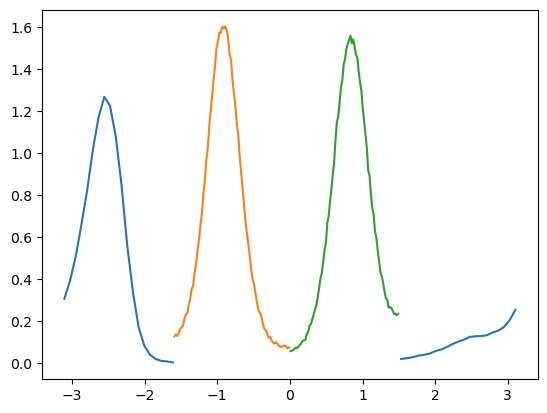

In [79]:
for _nn in nn.nns:
    plot_1D_histogram_(get_torsion_np_(_nn.r, inds_CV), mask_0=True)

In [80]:
nn.set_ic_map_step1(ind_root_atom = ind_rO, option = option)

molecule with 51 atoms, of which 32 are heavy atoms, and the rest are 19 hydrogens.
atoms with incides [22, 25, 19] are set to be the Cartesian_Block
position of the molecule specified by atoms with index: 22
rotation of the molecule specified by atoms with indices: [25, 19]
conformation of the molecule specified by all other atoms.
molecule with 51 atoms, of which 32 are heavy atoms, and the rest are 19 hydrogens.
atoms with incides [22, 25, 19] are set to be the Cartesian_Block
position of the molecule specified by atoms with index: 22
rotation of the molecule specified by atoms with indices: [25, 19]
conformation of the molecule specified by all other atoms.
molecule with 51 atoms, of which 32 are heavy atoms, and the rest are 19 hydrogens.
atoms with incides [22, 25, 19] are set to be the Cartesian_Block
position of the molecule specified by atoms with index: 22
rotation of the molecule specified by atoms with indices: [25, 19]
conformation of the molecule specified by all other at

In [81]:
nn.set_ic_map_step2(check_PES=True)

COM removed from data without taking into account PBC of the box
inds_rand attempt: 1
found !
checking that PES matches the sampled dataset:
errT: 1.397818660521466e-06 -0.0001774036812491886 0.00018046236540669724
errV: -1.3473503722423175e-06 -0.00018657973372171455 0.0001896384178792232
COM removed from data without taking into account PBC of the box
inds_rand attempt: 1
found !
checking that PES matches the sampled dataset:
errT: -2.076846544312616e-06 -0.00013458210301564577 0.00015905157628992583
errV: 4.695080184546896e-07 -0.00015293420797490853 0.00019575578620845135
COM removed from data without taking into account PBC of the box
inds_rand attempt: 1
found !
checking that PES matches the sampled dataset:
errT: -3.962525328617517e-06 -0.00017128631291996044 0.00018046236540669724
errV: -1.9866153615453184e-06 -0.0001774036812491886 0.00013764078717315442


In [82]:
nn.set_ic_map_step3()


            !! for each of the 3 supercell datasets provided,
            it is important to provide here a list (n_mol_unitcells) describing 
            the number of molecules in each underlying unitcell, respectively.
            
initialising on 277942 datapoints provided
16 out of 48 potentially periodic marginal variables are set to periodic
This topology is shared over all molecules.

ic_map inversion errors on a small random batch:
positons: 1.9613099
volume: 3.0517578e-05
0.9999915
initialising on 277942 datapoints provided
16 out of 48 potentially periodic marginal variables are set to periodic
This topology is shared over all molecules.

ic_map inversion errors on a small random batch:
positons: 1.8775022
volume: 3.0517578e-05
1.0
initialising on 277942 datapoints provided
16 out of 48 potentially periodic marginal variables are set to periodic
This topology is shared over all molecules.

ic_map inversion errors on a small random batch:
positons: 1.8805737
volume: 3.051757

In [83]:
nn.set_model(
                learning_rate = 0.001, 
                evaluation_batch_size = 5000,
                n_layers = 4,
            )

matching ic_maps for the single model:
16 out of 48 potentially periodic marginal variables are set to periodic
This topology is shared over all molecules.

16 out of 48 potentially periodic marginal variables are set to periodic
This topology is shared over all molecules.

16 out of 48 potentially periodic marginal variables are set to periodic
This topology is shared over all molecules.

checking that ic_maps match the model:
There are 28798272 trainable parameters in this model, among 64 trainable weights.
[To see dimensionalities of the trainable weights print(list(self.shapes_trainable_weights)).] 
inv_test_res0 ([[0.31893548, 1.9613106], [1.630249e-05, -0.005554199, 0.008636475]], [[[2.7810553e-05, 0.0011377335]], [3.2836913e-05, -0.0115356445, 0.010986328]])
inv_test_res0 ([[0.31579193, 1.9331021], [-2.0739746e-05, -0.007171631, 0.006652832]], [[[2.7245569e-05, 0.0012142658]], [-5.0201415e-05, -0.011230469, 0.01171875]])
inv_test_res0 ([[0.31681237, 1.9084456], [1.7761231e-06, -

In [84]:
nn.set_trainer(n_batches_between_evaluations=50)

'37.74 999 1999 39 AVMD_T:[437.99842696 441.34926181 440.67349938] AVMD_V:[438.49650206754353, 438.49650206754353, 438.49650206754353] || FE:[441.28825055752833, 444.02888116443216, 443.6581914929669] SD:[0.06095122978796146, 0.04870044022497689, 0.053956433207725536]'

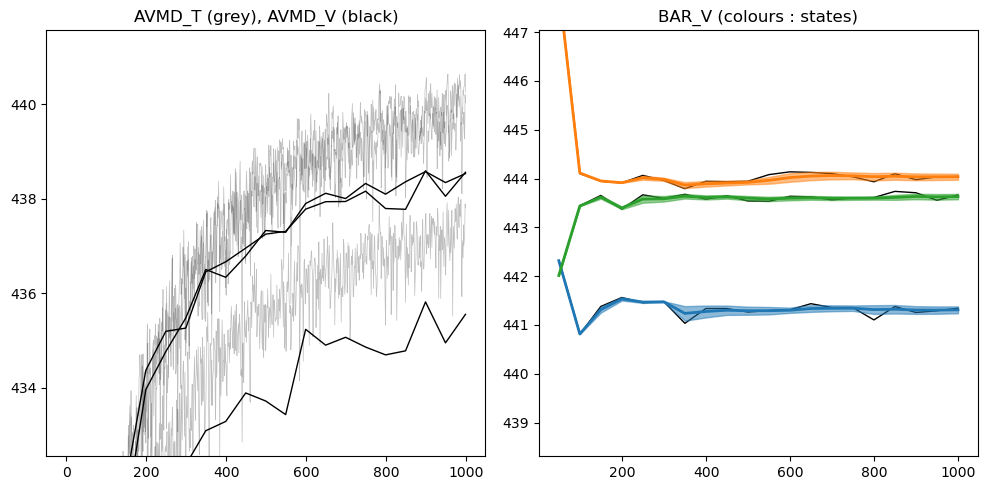

training time so far: 17.14 minutes
saved ./O//NN/training_results/misc/mivebresib_single_molecule_T=300K_3_states_SC__misc_
misc training outputs were saved


In [85]:
# BAR only

n_batches = 1000
nn.train(   n_batches=n_batches,
         
            save_BAR = True,
            save_mBAR = False,
         
            f_halfwindow_visualisation = 3.0,
        )

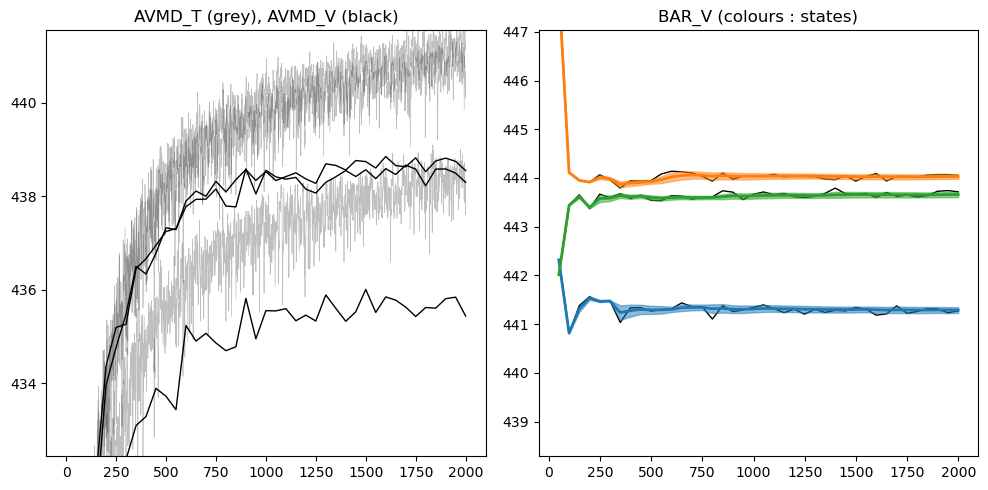

training time so far: 38.21 minutes
saved ./O//NN/training_results/misc/mivebresib_single_molecule_T=300K_3_states_SC__misc_
misc training outputs were saved


In [86]:
# BAR and MBAR

n_batches = 1000
nn.train(   n_batches=n_batches,
         
            save_BAR = True,
            save_mBAR = True,

            f_halfwindow_visualisation = 3.0,
        )

In [87]:
nn.load_misc_()

In [88]:
nn.load_energies_during_training_()

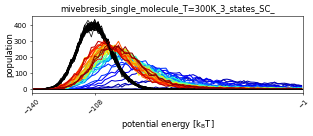

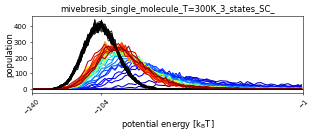

[None, None, None]

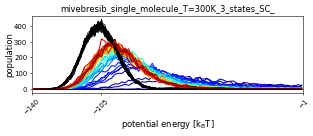

In [98]:
[nn.plot_energies_during_training_(_range=[-140,-1], crystal_index=k, dpi=50) for k in range(n_states)]

# PGMmol + BAR

In [90]:
nn.solve_BAR_using_pymbar_() # rerun=True if saving again with same name

39
BAR: T estimate39skipped
saved ./O//NN/training_results/BAR/mivebresib_single_molecule_T=300K_3_states_SC__BAR__BAR_output_crystal_index=2
saved BAR result


In [91]:
FEs_counts = np.array([0.      , 2.734086, 2.387801])

441.2877013581623 +/- 0.0600603144259323 final: 441.2877013581649 +/- 0.06006031442308355
444.02967195797953 +/- 0.04804709354877568 final: 444.029671958825 +/- 0.0514412651861645
443.66000876360647 +/- 0.05402719657410594 final: 443.6600087622718 +/- 0.05402719650991755


(440.0, 445.0)

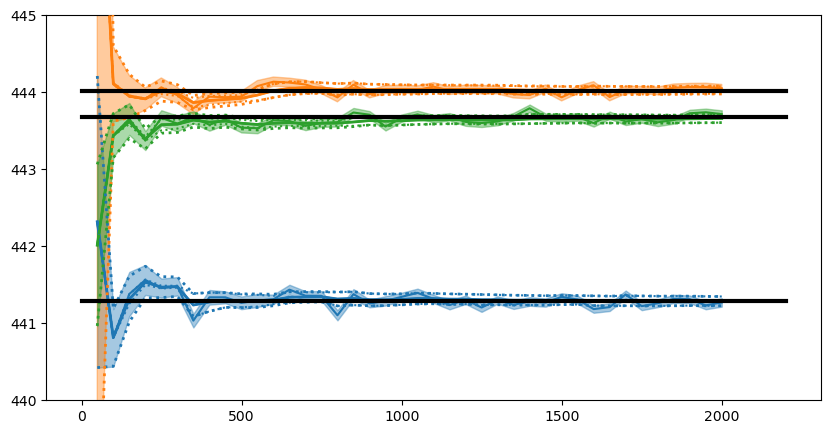

In [99]:
fig = plt.figure(figsize=(10,5))
[nn.plot_result_(crystal_index=k, colors=['C'+str(k)]*4) for k in range(n_states)] #+['black']) 

plt.plot([0,2200],[FEs_counts+nn.nns[0].BAR_V_FE]*2, color='black', zorder=10, linewidth=3)
plt.ylim(440,445)

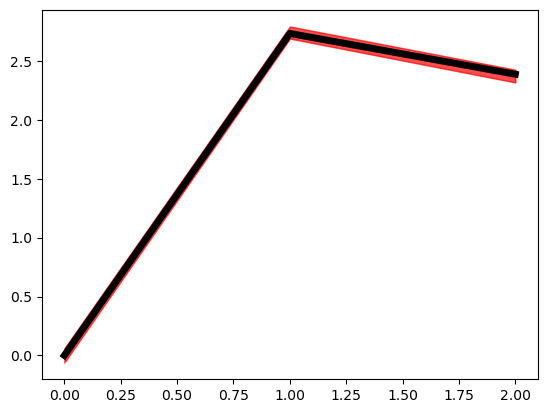

In [93]:
FEs = np.array([_nn.BAR_V_FE for _nn in nn.nns])
delta = FEs - FEs.min()
SEs = np.array([_nn.BAR_V_SE for _nn in nn.nns])

plt.fill_between(np.arange(n_states), delta-SEs, delta+SEs, color='red', alpha=0.7)
plt.plot(FEs_counts, color='black', linewidth=5)

In [97]:
print(f'adding up the {n_states} current partition functions to check that absolute FEs are consistent with the earlier estimate:\n')

print('absolute FE when training on whole configurational space earlier (kT):\n  ', '441.14760441698144 +/- 0.037174757123121835')

middle = -np.log(np.exp(-FEs).sum()) ; lower = -np.log(np.exp(-(FEs-SEs)).sum()); upper =-np.log(np.exp(-(FEs+SEs)).sum())

print('since no gaps left on the CV, this should match to the above number within error (kT):\n  ', middle,'+/-', upper-middle) #, middle-lower)

adding up the 3 current partition functions to check that absolute FEs are consistent with the earlier estimate:

absolute FE when training on whole configurational space earlier (kT):
   441.14760441698144 +/- 0.037174757123121835
since no gaps left on the CV, this should match to the above number within error (kT):
   441.14125873182326 +/- 0.059091437052472884


In [95]:
nn.save_model_()

saved ./O//NN/training_results/fitted_models/mivebresib_single_molecule_T=300K_3_states_SC__model_


In [96]:
nn.save_samples_(20000)

saved ./O//NN/training_results/samples/mivebresib_single_molecule_T=300K_3_states_SC__samples__crystal_index=0
saved ./O//NN/training_results/samples/mivebresib_single_molecule_T=300K_3_states_SC__samples__crystal_index=1
saved ./O//NN/training_results/samples/mivebresib_single_molecule_T=300K_3_states_SC__samples__crystal_index=2


In [ ]:
#################

# PGMmol + MBAR

In [100]:
nn.solve_mBAR_using_pymbar_() # rerun=True if saving again with same name

39
BAR: T estimate39skipped
saved ./O//NN/training_results/BAR/mivebresib_single_molecule_T=300K_3_states_SC__mBAR__mBAR_output
saved mBAR result


(20.0, 40.0)

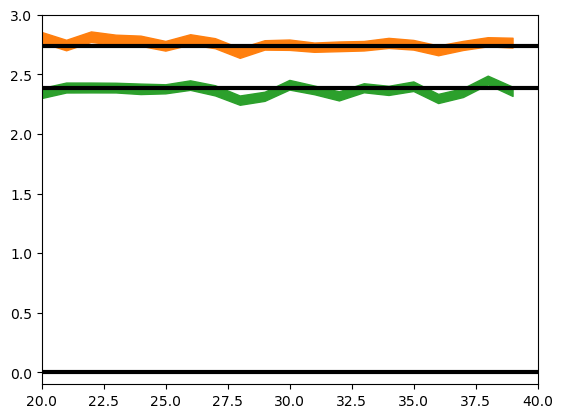

In [105]:
lower = nn.estimates_mBAR[2,:,0] - nn.estimates_mBAR[3,:,0]
upper = nn.estimates_mBAR[2,:,0] + nn.estimates_mBAR[3,:,0]
for k in range(3):
    plt.fill_between(np.arange(len(upper)), lower[:,k], upper[:,k], color='C'+str(k))
    
plt.plot([0,len(upper)], [FEs_counts]*2, color='black', zorder=10, linewidth=3)
plt.ylim(-0.1,3)
plt.xlim(20,40)

In [ ]:
####################################################################
## next TODO: train on biased data and reweight BAR like in paper1

In [108]:
##
nn.load_samples_()

In [117]:
[save_coordiantes_as_pdb_(reshape_to_flat_np_(nn.samples_from_model[k][::20],n_atoms_in_molecule=n_atoms_mol,n_molecules=1)*10.0, # A
                        name = f'check_{k}') for k in range(n_states)];

saved check_0.pdb
saved check_1.pdb
saved check_2.pdb
